Tamanho do vetor: 113999
Tamanho do vetor 50% 56999
56999 15
k_range: range(1, 100)
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99


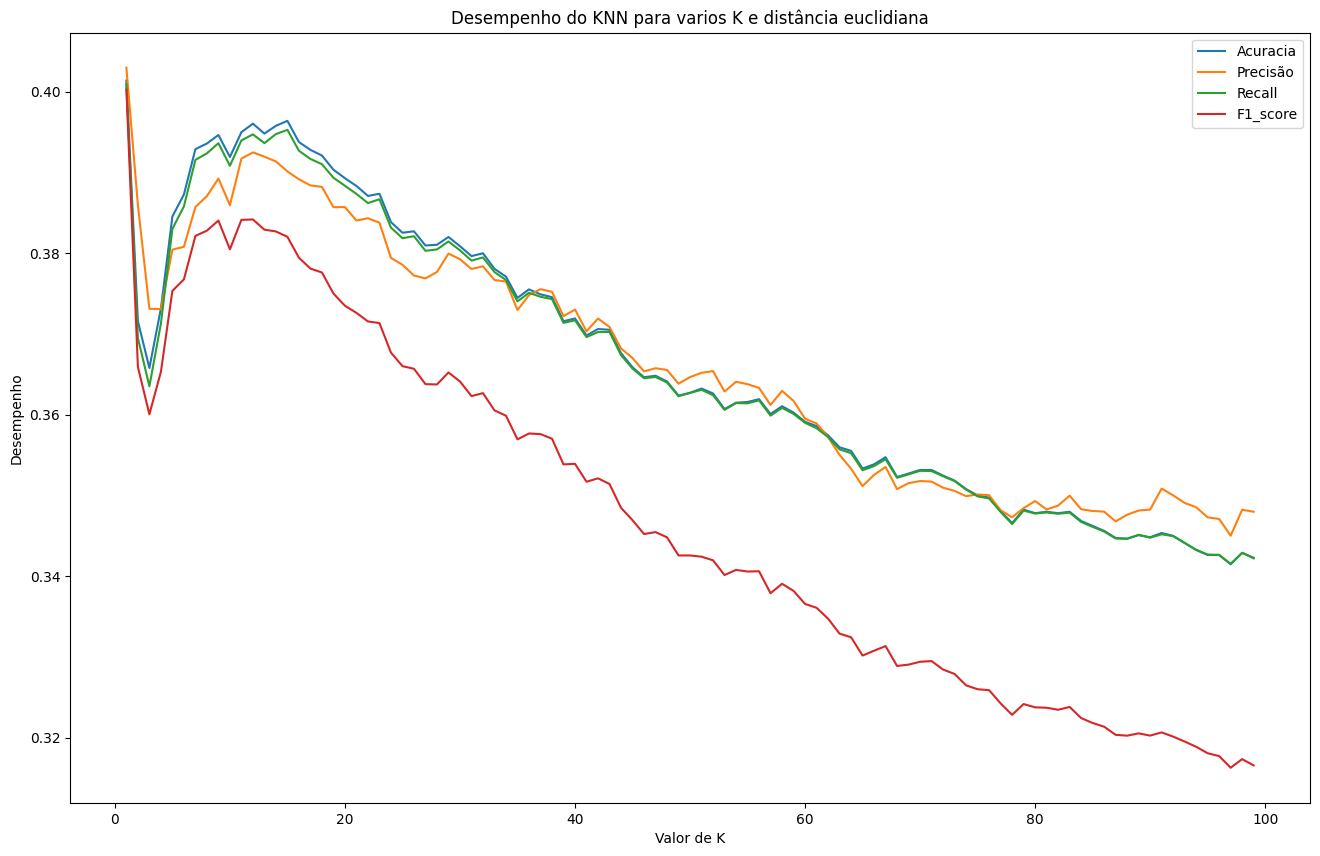

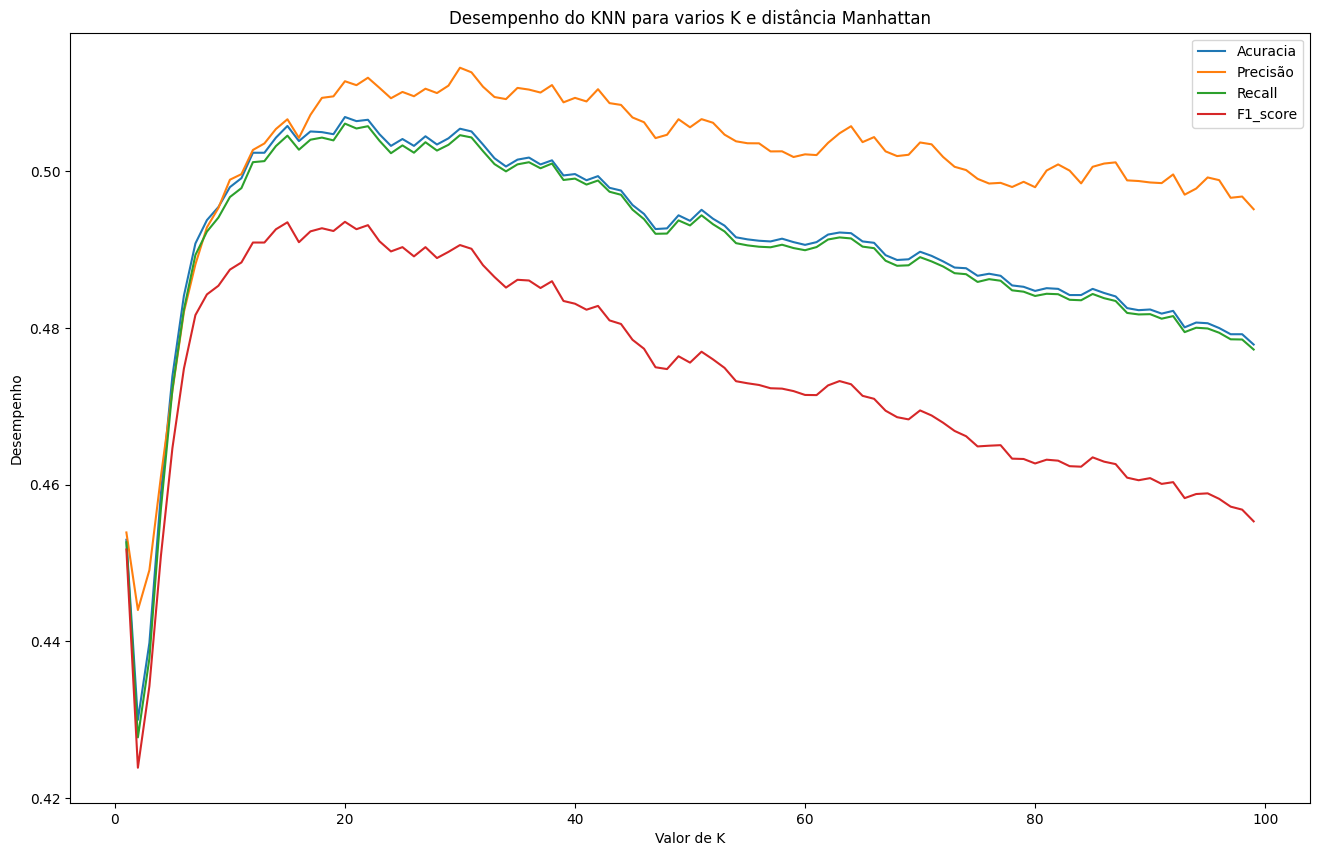

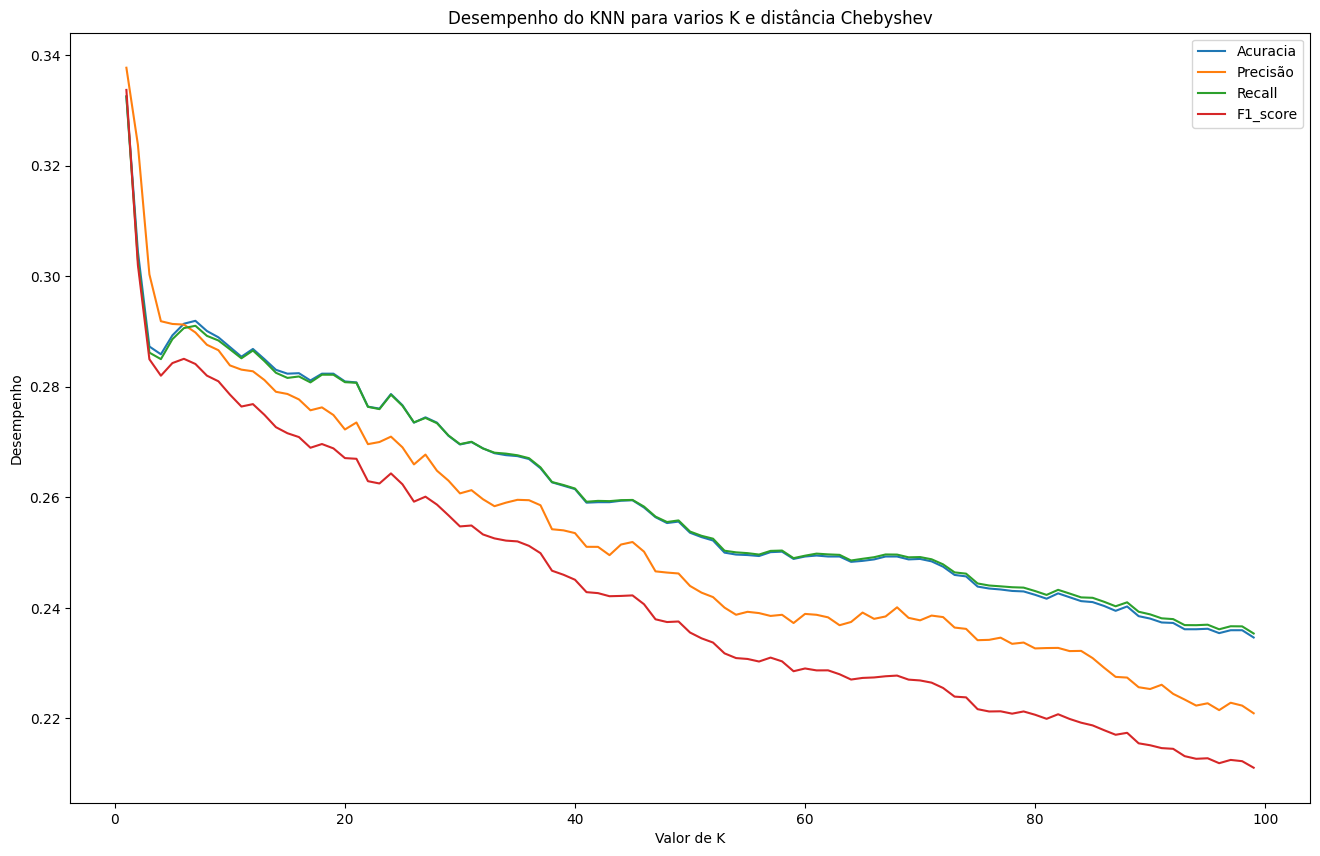

In [ ]:
pa#
#
# USANDO O K-NN NA BASE DE DADOS DO Spotyfy
# ESCOLHENDO VARIOS K'S PARA A BASE
#

import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
plt.rcParams['figure.figsize'] = [16, 10]
import random

#definindo semente para geracao de numeros aleatorios
random.seed(10)

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning
#https://archive.ics.uci.edu/ml/datasets/Ionosphere


dataset = pandas.read_csv("/content/dataset.csv")


#########################################################################
######                     Preparação de Dados                  #########
#########################################################################

#Limpeza do data frame de dados faltantes
dataset = dataset.dropna(axis=0, how='any')

#print("Primeiros dados")
#print(dataset.head(5))

#Criação de um dataframe menor sem a ultima coluna
datasetfeat = dataset.iloc[:, :-1]

#Eliminação das colunas com dados não numéricos
dataset1 = datasetfeat.select_dtypes(include=['int64', 'float64'])

df_max = dataset1.max(axis=0)
df_min = dataset1.min(axis=0)
#print('Max:',df_max)
#print('Min:',df_min)

#Ajuste de escala
for coluna in dataset1.columns:
    dataset1[coluna] = dataset1[coluna] / (df_max[coluna] - df_min[coluna])

# Exibindo o DataFrame
#print(dataset1.head(5))

#divisao de dados atributos e classe
X = dataset1.values[:,:]  # 0:-1] #caracteristicas (features)
Y = dataset.values[:, -1] #classe a ser analisada: track_genre

#Utilizar o 50% dos dados
print('Tamanho do vetor:',len(Y))
d50 = int(0.50*len(Y))

X = X[0:d50,:]
Y = Y[0:d50]

print('Tamanho do vetor 50%',len(Y))


print(X.shape[0],X.shape[1])


#usando o metodo para criar os conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10)

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.50, random_state = 10)


#construindo o espaco de busca por configuracoes do classificador: Euclidean
k_range = range(1,100)
print('k_range:',k_range)



# Dicionários para armazenar os resultados
scores_euclidean = {'k':[],'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
scores_manhattan = {'k':[],'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
scores_chebyshev = {'k':[],'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

for j in k_range:
  print('k=',j)
  #Variação de K
  knn_euc = neighbors.KNeighborsClassifier(n_neighbors=j,metric='euclidean')
  knn_man = neighbors.KNeighborsClassifier(n_neighbors=j,metric='manhattan')
  knn_chev = neighbors.KNeighborsClassifier(n_neighbors=j,metric='chebyshev')

  #Conjunto de treinamento
  knn_euc.fit(X_train, y_train)
  knn_man.fit(X_train, y_train)
  knn_chev.fit(X_train, y_train)

  # Fazendo previsões para validação
  y_pred = knn_euc.predict(X_valid)
  y_predman = knn_man.predict(X_valid)
  y_predchev = knn_chev.predict(X_valid)

  # Avaliando o modelo

  #Distancia Euclidiana
  acuracia = accuracy_score(y_valid, y_pred)
  precisao = precision_score(y_valid, y_pred, average='macro')
  recall =   recall_score(y_valid, y_pred, average='macro')
  f1score =  f1_score(y_valid, y_pred, average='macro')

  scores_euclidean['k'].append(j)
  scores_euclidean['accuracy'].append(acuracia)
  scores_euclidean['precision'].append(precisao)
  scores_euclidean['recall'].append(recall)
  scores_euclidean['f1_score'].append(f1score)

  #Distancia Manhattan
  acuracia = accuracy_score(y_valid, y_predman)
  precisao = precision_score(y_valid, y_predman, average='macro')
  recall =   recall_score(y_valid, y_predman, average='macro')
  f1score =  f1_score(y_valid, y_predman, average='macro')

  scores_manhattan['k'].append(j)
  scores_manhattan['accuracy'].append(acuracia)
  scores_manhattan['precision'].append(precisao)
  scores_manhattan['recall'].append(recall)
  scores_manhattan['f1_score'].append(f1score)

  #Distancia Chebyshev
  acuracia = accuracy_score(y_valid, y_predchev)
  precisao = precision_score(y_valid, y_predchev, average='macro')
  recall =   recall_score(y_valid, y_predchev, average='macro')
  f1score =  f1_score(y_valid, y_predchev, average='macro')

  scores_chebyshev['k'].append(j)
  scores_chebyshev['accuracy'].append(acuracia)
  scores_chebyshev['precision'].append(precisao)
  scores_chebyshev['recall'].append(recall)
  scores_chebyshev['f1_score'].append(f1score)




plt.title("Desempenho do KNN para varios K e distância euclidiana")
plt.plot(k_range, scores_euclidean['accuracy'],label='Acuracia')
plt.plot(k_range, scores_euclidean['precision'],label='Precisão')
plt.plot(k_range, scores_euclidean['recall'],label='Recall')
plt.plot(k_range, scores_euclidean['f1_score'],label='F1_score')
plt.xlabel('Valor de K')
plt.ylabel('Desempenho')
plt.legend()
plt.show()

plt.title("Desempenho do KNN para varios K e distância Manhattan")
plt.plot(k_range, scores_manhattan['accuracy'],label='Acuracia')
plt.plot(k_range, scores_manhattan['precision'],label='Precisão')
plt.plot(k_range, scores_manhattan['recall'],label='Recall')
plt.plot(k_range, scores_manhattan['f1_score'],label='F1_score')
plt.xlabel('Valor de K')
plt.ylabel('Desempenho')
plt.legend()
plt.show()

plt.title("Desempenho do KNN para varios K e distância Chebyshev")
plt.plot(k_range, scores_chebyshev['accuracy'],label='Acuracia')
plt.plot(k_range, scores_chebyshev['precision'],label='Precisão')
plt.plot(k_range, scores_chebyshev['recall'],label='Recall')
plt.plot(k_range, scores_chebyshev['f1_score'],label='F1_score')
plt.xlabel('Valor de K')
plt.ylabel('Desempenho')
plt.legend()
plt.show()




In [ ]:

import numpy as np
#print(scores_euclidean)

for chave in scores_euclidean:
  print(chave)

####### Euclidean  ###########
scoreseucnp = np.array([scores_euclidean['k'], scores_euclidean['accuracy'],scores_euclidean['precision'],scores_euclidean['recall'],scores_euclidean['f1_score']])
scoreseucnp = np.transpose(scoreseucnp)

#print(scoreseucnp)
#print(scoreseucnp.shape)
#print(scoreseucnp[2,1])
max = np.max(scoreseucnp[:,2])
pos = np.argmax(scoreseucnp[:,2])
kmax = scoreseucnp[pos,0]

print('Desempenho na Validação do KNN para a distância Euclidiana')
print('K:',kmax)
print('Accuracy:',scoreseucnp[pos,1])
print('Precision:',scoreseucnp[pos,2])
print('Recall:',scoreseucnp[pos,3])
print('F1 Score:',scoreseucnp[pos,4])




scoreseucnp[:]=0

####### Manhattan  ###########

scoreseucnp = np.array([scores_manhattan['k'], scores_manhattan['accuracy'],scores_manhattan['precision'],scores_manhattan['recall'],scores_manhattan['f1_score']])
scoreseucnp = np.transpose(scoreseucnp)

#print(scoreseucnp)
#print(scoreseucnp.shape)
#print(scoreseucnp[2,1])
max = np.max(scoreseucnp[:,2])
pos = np.argmax(scoreseucnp[:,2])
kmax = scoreseucnp[pos,0]

print('Desempenho na Validação do KNN para a distância Manhattan')
print('K:',kmax)
print('Accuracy:',scoreseucnp[pos,1])
print('Precision:',scoreseucnp[pos,2])
print('Recall:',scoreseucnp[pos,3])
print('F1 Score:',scoreseucnp[pos,4])


scoreseucnp[:]=0

####### Chebyshev  ###########

scoreseucnp = np.array([scores_chebyshev['k'], scores_chebyshev['accuracy'],scores_chebyshev['precision'],scores_chebyshev['recall'],scores_chebyshev['f1_score']])
scoreseucnp = np.transpose(scoreseucnp)

#print(scoreseucnp)
#print(scoreseucnp.shape)
#print(scoreseucnp[2,1])
max = np.max(scoreseucnp[:,2])
pos = np.argmax(scoreseucnp[:,2])
kmax = scoreseucnp[pos,0]

print('Desempenho na Validação do KNN para a distância Chebyshev')
print('K:',kmax)
print('Accuracy:',scoreseucnp[pos,1])
print('Precision:',scoreseucnp[pos,2])
print('Recall:',scoreseucnp[pos,3])
print('F1 Score:',scoreseucnp[pos,4])


k
accuracy
precision
recall
f1_score
Desempenho na Validação do KNN para a distância Euclidiana
K: 8.0
Accuracy: 0.7514498757249378
Precision: 0.7900338262265699
Recall: 0.6667629625621999
F1 Score: 0.6790330595308971
Desempenho na Validação do KNN para a distância Manhattan
K: 8.0
Accuracy: 0.8019884009942005
Precision: 0.8360209407949588
Recall: 0.7102495296716757
F1 Score: 0.7231200691877154
Desempenho na Validação do KNN para a distância Chebyshev
K: 2.0
Accuracy: 0.6420878210439105
Precision: 0.7041649562506002
Recall: 0.5732394797236512
F1 Score: 0.5821477086088379


In [ ]:
print(X_valid)

[[ 1.          0.66777133  0.61075978  0.5948463   0.60027587]
 [ 2.          0.64208782  0.70416496  0.57323948  0.58214771]
 [ 3.          0.63380282  0.68697426  0.56542054  0.57859824]
 [ 4.          0.63960232  0.69265808  0.57043604  0.5820795 ]
 [ 5.          0.61888981  0.67400808  0.55235445  0.56522583]
 [ 6.          0.62717481  0.67976414  0.55955576  0.57064808]
 [ 7.          0.62054681  0.6701332   0.55358387  0.56376039]
 [ 8.          0.63297432  0.68358489  0.56472803  0.57451427]
 [ 9.          0.63794532  0.68799514  0.56891377  0.57925454]
 [10.          0.63131732  0.68287218  0.56336852  0.57338075]
 [11.          0.63380282  0.68510094  0.56531131  0.57674806]
 [12.          0.62386081  0.67691379  0.55682491  0.56739316]
 [13.          0.62137531  0.67327774  0.55472535  0.56575902]
 [14.          0.61971831  0.67212622  0.55336358  0.56411169]
 [15.          0.61888981  0.67178766  0.55246288  0.56333587]
 [16.          0.61888981  0.67261098  0.55277052  0.56

In [ ]:
print(X_valid)

[[1.62522791e-01 1.72043011e-01 3.87684717e-02 ... 7.67839196e-01
  4.11123712e-01 8.00000000e-01]
 [1.98491629e-01 0.00000000e+00 4.41977360e-02 ... 7.38693467e-01
  3.90217445e-01 8.00000000e-01]
 [4.42317255e-01 6.34408602e-01 3.78313571e-02 ... 7.74874372e-01
  4.38098877e-01 8.00000000e-01]
 ...
 [4.26736284e-01 6.66666667e-01 3.84451913e-02 ... 7.76884422e-01
  6.44646878e-01 8.00000000e-01]
 [1.14370960e-02 2.36559140e-01 4.03334760e-02 ... 2.65326633e-01
  5.85921963e-01 8.00000000e-01]
 [6.63020056e-04 7.95698925e-01 3.97781722e-02 ... 6.72361809e-01
  5.34523281e-01 8.00000000e-01]]


In [ ]:
# LVQ for the Spotify
import numpy as np
import pandas
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
plt.rcParams['figure.figsize'] = [16, 10]
import random

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Locate the best matching unit
def get_best_matching_unit(codebooks, test_row):
	distances = list()
	for codebook in codebooks:
		dist = euclidean_distance(codebook, test_row)
		distances.append((codebook, dist))
	distances.sort(key=lambda tup: tup[1])
	return distances[0][0]

# Make a prediction with codebook vectors
def predict(codebooks, test_row):
	bmu = get_best_matching_unit(codebooks, test_row)
	return bmu[-1]

# Create a random codebook vector
def random_codebook(train):
	n_records = len(train)
	n_features = len(train[0])
	codebook = [train[randrange(n_records)][i] for i in range(n_features)]
	return codebook

# Train a set of codebook vectors
def train_codebooks(train, n_codebooks, lrate, epochs):
	codebooks = [random_codebook(train) for i in range(n_codebooks)]
	for epoch in range(epochs):
		rate = lrate * (1.0-(epoch/float(epochs)))
		for row in train:
			bmu = get_best_matching_unit(codebooks, row)
			for i in range(len(row)-1):
				error = row[i] - bmu[i]
				if bmu[-1] == row[-1]:
					bmu[i] += rate * error
				else:
					bmu[i] -= rate * error
	return codebooks

# LVQ Algorithm
def learning_vector_quantization(train, test, n_codebooks, lrate, epochs):
	codebooks = train_codebooks(train, n_codebooks, lrate, epochs)
	predictions = list()
	for row in test:
		output = predict(codebooks, row)
		predictions.append(output)
	return(predictions)


#######################################################
#######################################################

####### Código Principal do Método LVQ ################

#######################################################
#######################################################
# Test LVQ on Spotify
seed(1)
# load and prepare data
dataset0 = pandas.read_csv("/content/dataset.csv")


#######################################################
######          Preparação de Dados           #########
#######################################################

#Limpeza do data frame de dados faltantes
dataset0 = dataset0.dropna(axis=0, how='any')

#Criação de um dataframe menor sem a ultima coluna
datasetfeat = dataset0.iloc[:, :-1]

#Eliminação das colunas com dados não numéricos
dataset2 = datasetfeat.select_dtypes(include=['int64', 'float64'])

df_max = dataset2.max(axis=0)
df_min = dataset2.min(axis=0)

#Adimensionalização das features
for coluna in dataset2.columns:
    dataset2[coluna] = dataset2[coluna] / (df_max[coluna] - df_min[coluna])


#divisao de dados atributos e classe
X = dataset2.values[:,:]  # 0:-1] #caracteristicas (features)
Y = dataset0.values[:, -1] #classe a ser analisada: track_genre

#Utilizar o 50% dos dados
print('Tamanho do vetor:',len(Y))
d50 = int(0.010*len(Y))

X = X[0:d50,:]
Y = Y[0:d50]

print('Tamanho do vetor 50%',len(Y))

#Criação de conjuntos de treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10)

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.50, random_state = 10)


#Conjunto de Treinamento
#Juntar a matriz de features com o vetor de classes, o vetor de classes é posicionado no final
dataset3 = np.hstack((X_train, y_train[:, np.newaxis]))

#Transforma o array Python para uma lista
dataset4 = dataset3.tolist()

#Transforma os valores da lista em arrayas
dataset =[]
for valores in dataset4:
  arrays = list(map(str, valores))
  dataset.append(arrays)

#Transforma os elementos numéricos da lista em números reais
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)

# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

#######################################################
######          Avaliação do algoritmo LVQ    #########
#######################################################

# evaluate algorithm
n_folds = 5
learn_rate = 0.3
n_epochs = 50
n_codebooks = 15
scores = evaluate_algorithm(dataset, learning_vector_quantization, n_folds, n_codebooks, learn_rate, n_epochs)
print('Conjunto de treinamento')
print('n_folds:',n_folds)
print('learn_rate:',learn_rate)
print('n_epochs:',n_epochs)
print('n_codebooks:',n_codebooks)

print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Tamanho do vetor: 113999
Tamanho do vetor 50% 1139
Conjunto de treinamento
n_folds: 5
learn_rate: 0.3
n_epochs: 50
n_codebooks: 15
Scores: [87.5, 86.02941176470588, 85.29411764705883, 90.44117647058823, 90.44117647058823]
Mean Accuracy: 87.941%
